<a href="https://colab.research.google.com/github/Erickpython/kodeCamp_5X-MachineLearning/blob/main/Breast_Cancer_Dataset_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Breast Cancer Dataset Classifier**

The following link https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data contains data that correlates the features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. It is used to classify the mass as either benign (B) or malignant (M).

You are required to implement a 3-layer neural network to classify a breast mass sample based on this dataset. Ensure each step of the process is properly documented using a text block in your notebook just before the code block. Implement in a Jupyter Notebook and submit the link below.



#### **Requirements:**

- Implement a 90% - 10% test train split. Ensure your data is well shuffled before splitting.
- Your neural network should have 2 hidden and 1 output layers.
- Use the ReLU activation for hidden layers and the sigmoid function for the output layer.
- Train your model with with SGD optimizer and choose an appropriate learning rate and criterion.
- Implement L2 regularization in your model to avoid overfitting.
- Your model must achieve 99% accuracy on the test dataset
- Implement early stopping to minimize computational resources
- At the end of the training print out the following:
  - Accuracy of the model on the validation data
  - Number of epochs to get to that accuracy
  - Criterion used

In [77]:
"""
Insert your imports here
"""
import kagglehub as kh
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import torch
from torch import nn
from torch.optim import SGD

In [78]:
"""
Download the breast dataset
"""
path = kh.dataset_download("uciml/breast-cancer-wisconsin-data")

df = pd.read_csv(path + "/data.csv")

df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


#### Implement feature engineering

In [79]:
df.info()   

<class 'pandas.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    str    
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             569 non-null

## From the data 
    - Only  Unnamed: 32 colum that is null - drop it 
    - Data typr is int{float64} - only [diagnosis column string - B or M] - OneHot Encoding 
    - Standard Scalar of the numerical columns 
    x = [Numericakl columns]
    y = [diagnosis column]

In [80]:
# drop a column by name (modify df in-place)
df.drop(columns='Unnamed: 32', inplace=True)
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    str    
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             569 non-null

In [81]:
X = df.drop(columns='diagnosis')
y = df['diagnosis']


"""
Split processed dataframe into test and validation sets.
"""
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.1,
    random_state=42,
    stratify=y
)


# Scale X
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_val_scaled = scalar.transform(X_val)

# Encode y to binary (B -> 0, M -> 1) — simpler and compatible with a single sigmoid output
y_train = y_train.map({'B': 0, 'M': 1}).astype(np.float32)
y_val = y_val.map({'B': 0, 'M': 1}).astype(np.float32)

In [82]:
"""
Get the PyTorch tensors
"""
X_train = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train = torch.tensor(y_train.values.reshape(-1, 1), dtype=torch.float32)

X_val = torch.tensor(X_val_scaled, dtype=torch.float32)
y_val = torch.tensor(y_val.values.reshape(-1, 1), dtype=torch.float32)

In [83]:
"""
Implement your neural network architecture here
"""

def count_parameters(m):
    return sum(p.numel() for p in m.parameters() if p.requires_grad)

# input size from the processed features
input_size = X_train.shape[1]
hidden1 = 30
hidden2 = 16

model = nn.Sequential(
    nn.Linear(input_size, hidden1),
    nn.ReLU(),
    nn.Linear(hidden1, hidden2),
    nn.ReLU(),
    nn.Linear(hidden2, 1),
    nn.Sigmoid()  # single-output sigmoid for binary classification
)

print(f"Model initialized — trainable params: {count_parameters(model):,}")

Model initialized — trainable params: 1,473


In [84]:
"""
Define hyperparameters
"""
# Training choices
epochs = 1000
learning_rate = 0.01
weight_decay = 1e-4   # L2 regularization (matches requirement)

# Loss and optimizer
criterion = nn.BCELoss()
optimizer = SGD(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

# Early stopping
patience = 15         # stop if validation loss doesn't improve for `patience` epochs
min_delta = 1e-4      # minimum change to qualify as improvement
best_val_loss = float('inf')
best_epoch = 0
best_val_acc = 0.0
early_stop_counter = 0

In [85]:
"""
Neural network training loop
"""
train_losses = []
val_losses = []
train_accuracy = []
val_accuracy = []

for epoch in range(1, epochs + 1):
    # Train mode
    model.train()

    # Forward propagation (full-batch)
    y_hat = model(X_train)
    loss = criterion(y_hat, y_train)

    # Backward propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Accumulate training loss
    train_losses.append(loss.item())

    # Training accuracy
    with torch.no_grad():
        train_preds = (y_hat >= 0.5).float()
        train_acc = (train_preds.eq(y_train).sum().item()) / y_train.size(0)
        train_accuracy.append(train_acc * 100)

    # Validation loss & accuracy
    model.eval()
    with torch.no_grad():
        y_val_hat = model(X_val)
        v_loss = criterion(y_val_hat, y_val)
        val_losses.append(v_loss.item())

        val_preds = (y_val_hat >= 0.5).float()
        v_acc = (val_preds.eq(y_val).sum().item()) / y_val.size(0)
        val_accuracy.append(v_acc * 100)

    # Early stopping (monitor validation loss)
    if v_loss.item() + min_delta < best_val_loss:
        best_val_loss = v_loss.item()
        best_epoch = epoch
        best_val_acc = v_acc * 100
        early_stop_counter = 0
        best_model_state = model.state_dict()
    else:
        early_stop_counter += 1

    # Progress logging
    if epoch == 1 or epoch % 10 == 0:
        print(f"Epoch {epoch}/{epochs} — train_loss: {loss.item():.4f}, val_loss: {v_loss.item():.4f}, val_acc: {v_acc*100:.2f}%")

    # Stop training when no improvement
    if early_stop_counter >= patience:
        print(f"Early stopping at epoch {epoch} (no improvement for {patience} epochs).")
        break

# restore best model (if saved)
if 'best_model_state' in locals():
    model.load_state_dict(best_model_state)

Epoch 1/1000 — train_loss: 0.7228, val_loss: 0.7168, val_acc: 35.09%
Epoch 10/1000 — train_loss: 0.7157, val_loss: 0.7100, val_acc: 35.09%
Epoch 20/1000 — train_loss: 0.7078, val_loss: 0.7025, val_acc: 35.09%
Epoch 30/1000 — train_loss: 0.6999, val_loss: 0.6949, val_acc: 36.84%
Epoch 40/1000 — train_loss: 0.6919, val_loss: 0.6874, val_acc: 59.65%
Epoch 50/1000 — train_loss: 0.6838, val_loss: 0.6797, val_acc: 64.91%
Epoch 60/1000 — train_loss: 0.6755, val_loss: 0.6719, val_acc: 73.68%
Epoch 70/1000 — train_loss: 0.6670, val_loss: 0.6639, val_acc: 80.70%
Epoch 80/1000 — train_loss: 0.6581, val_loss: 0.6556, val_acc: 82.46%
Epoch 90/1000 — train_loss: 0.6490, val_loss: 0.6469, val_acc: 80.70%
Epoch 100/1000 — train_loss: 0.6395, val_loss: 0.6378, val_acc: 82.46%
Epoch 110/1000 — train_loss: 0.6296, val_loss: 0.6284, val_acc: 84.21%
Epoch 120/1000 — train_loss: 0.6193, val_loss: 0.6185, val_acc: 84.21%
Epoch 130/1000 — train_loss: 0.6084, val_loss: 0.6082, val_acc: 82.46%
Epoch 140/1000 — 

In [86]:
def plot_losses(plt, title, train_losses, val_losses, label):
    plt.plot(train_losses, label=f"Train {label}")
    plt.plot(val_losses, label=f"Validation {label}")
    plt.legend()
    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel(label)

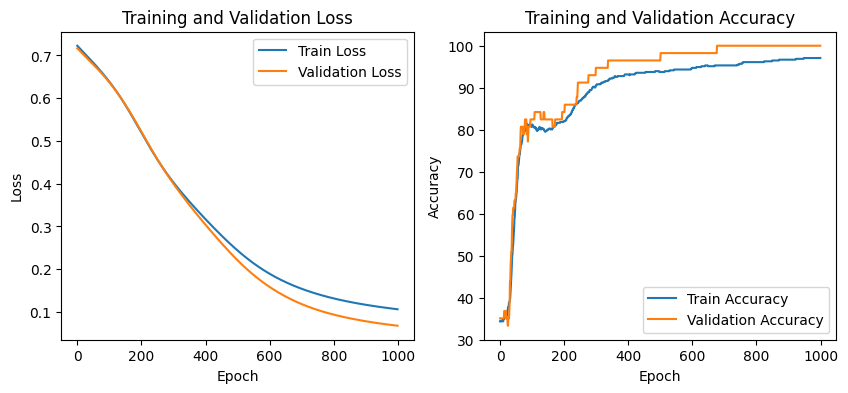

In [87]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plot_losses(plt, "Training and Validation Loss", train_losses, val_losses, label="Loss")
plt.subplot(1, 2, 2)
plot_losses(plt, "Training and Validation Accuracy", train_accuracy, val_accuracy, label="Accuracy")
plt.show()

In [88]:
"""
At the end of the training print out the following:
    - Accuracy of the model on the validation data
    - Number of epochs to get to that accuracy
    - Criterion used
"""
print(f"Best validation accuracy: {best_val_acc:.2f}%")
print(f"Epochs to get to that accuracy: {best_epoch}")
print(f"Criterion used: {criterion}")

Best validation accuracy: 100.00%
Epochs to get to that accuracy: 999
Criterion used: BCELoss()
